In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)

df = pd.read_csv(r"C:\Users\coolg\Desktop\Kushal\Mini Project\Admission.csv",sep = ",") #r is for raw input
df=df.rename(columns = {'Chance of Admit ':'Chance of Admit'})
df = df.drop(['Serial No.'], axis=1)
print(df.head())

   GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
0        337          118                  4  4.5   4.5  9.65         1   
1        324          107                  4  4.0   4.5  8.87         1   
2        316          104                  3  3.0   3.5  8.00         1   
3        322          110                  3  3.5   2.5  8.67         1   
4        314          103                  2  2.0   3.0  8.21         0   

   Chance of Admit  
0             0.92  
1             0.76  
2             0.72  
3             0.80  
4             0.65  


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(4)
memory usage: 31.3 KB
None


In [14]:
cnt_srs = df['University Rating'].value_counts().head()
trace = go.Bar(
    y=cnt_srs.index[::-1],
    x=cnt_srs.values[::-1],
    orientation = 'h',
    marker=dict(
        color=['#04A46D','#029AF9','#6D0601','#6D016D','#878D02']
    ),
)
layout = dict(
    title='Rating distribution of Universities',
    xaxis=dict(
        title='No. of Universities',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#2F3102'
        )
    ),
    yaxis=dict(
        title='Ratings of the Universities',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#2F3102'
        )
    )
    )
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="univs")

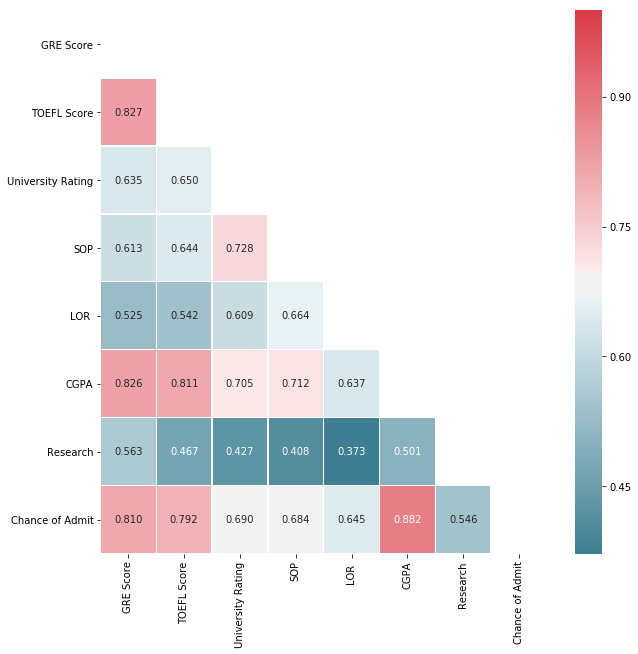

In [68]:
corr = df.corr()
plt.subplots(figsize=(10, 10)) #length and breadth of figure
dropSelf = np.zeros_like(corr) #Return an array of zeros with the same shape and type as a given array.
dropSelf[np.triu_indices_from(dropSelf)] = True #Return the indices for the upper-triangle of dropSelf and makes all those v True
colormap = sns.diverging_palette(220, 10, as_cmap=True) #To give color to the heatmap
sns.heatmap(corr, cmap=colormap, linewidths=.5, annot=True, fmt=".3f", mask=dropSelf) #mask will whitespace whatever is True
plt.show()

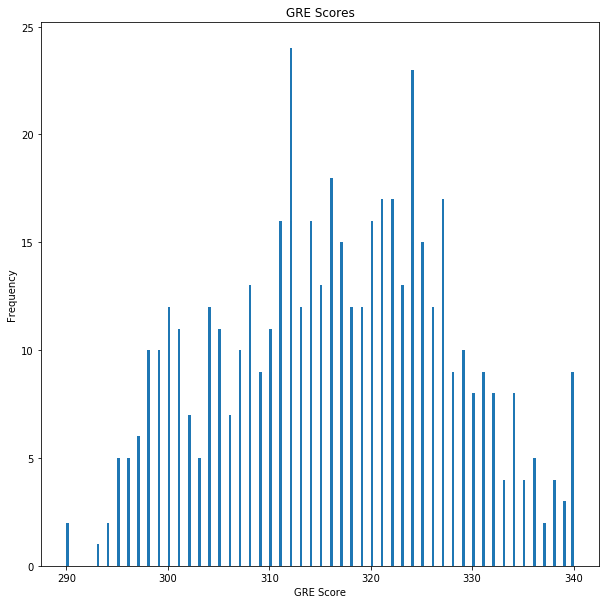

In [83]:
#Dense near 310-330, so anything above it will be reallly helpful
df["GRE Score"].plot(kind = 'hist',bins = 200,figsize = (10,10))
plt.title("GRE Scores")
plt.xlabel("GRE Score")
plt.ylabel("Frequency")
plt.show()

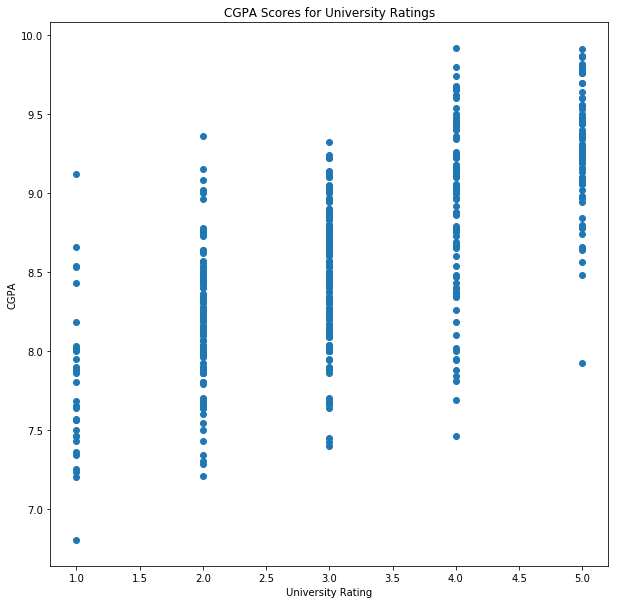

In [89]:
#For higher rating universities, more GPA required
plt.figure(figsize=(10, 10))
plt.scatter(df["University Rating"],df.CGPA)
plt.title("CGPA Scores for University Ratings")
plt.xlabel("University Rating")
plt.ylabel("CGPA")
plt.show()

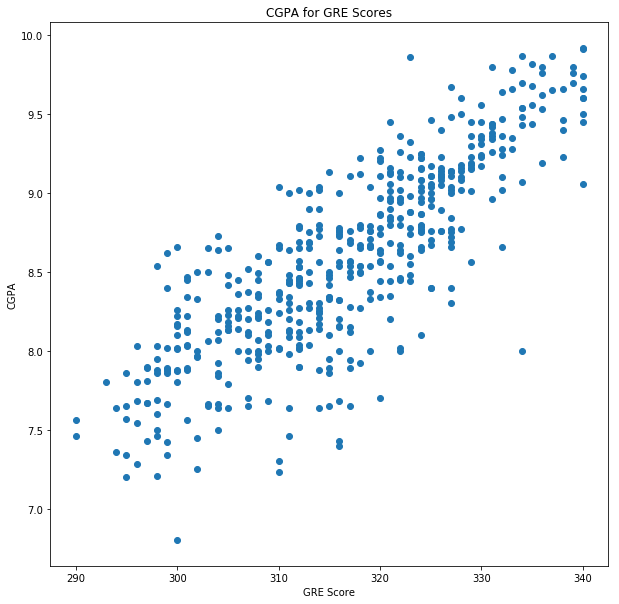

In [91]:
plt.figure(figsize=(10, 10))
plt.scatter(df["GRE Score"],df.CGPA)
plt.title("CGPA for GRE Scores")
plt.xlabel("GRE Score")
plt.ylabel("CGPA")
plt.show()

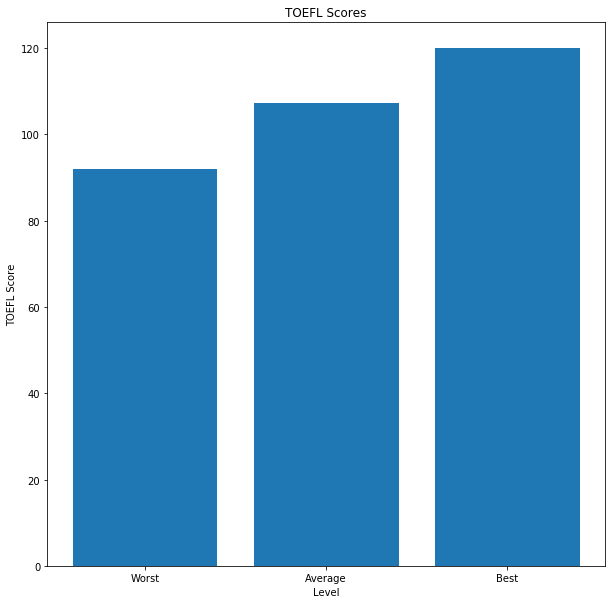

In [100]:
#The lowest TOEFL score is 92 and the highest Toefl score is 120. The average is 107.41.
plt.figure(figsize=(10, 10))
y = np.array([df["TOEFL Score"].min(),df["TOEFL Score"].mean(),df["TOEFL Score"].max()])
x = ["Worst","Average","Best"]
plt.bar(x,y)
plt.title("TOEFL Scores")
plt.xlabel("Level")
plt.ylabel("TOEFL Score")
plt.show()

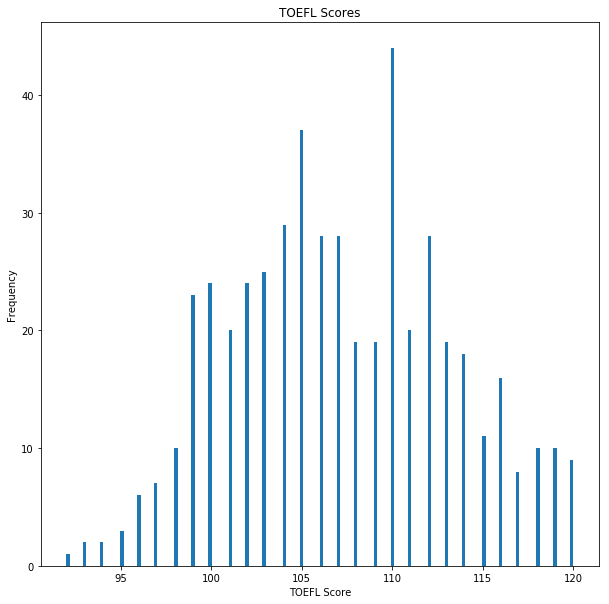

In [103]:
#Score above 110 is good
df["TOEFL Score"].plot(kind = 'hist',bins = 150,figsize = (10,10))
plt.title("TOEFL Scores")
plt.xlabel("TOEFL Score")
plt.ylabel("Frequency")
plt.show()

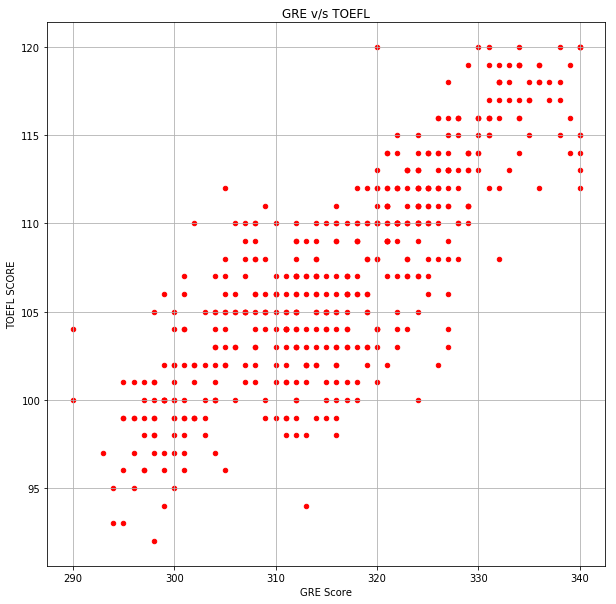

In [108]:
#GRE and TOEFL directly proportional
df.plot(kind='scatter', x='GRE Score', y='TOEFL Score',color="red",figsize = (10,10))
plt.xlabel("GRE Score")
plt.ylabel("TOEFL SCORE")
plt.title("GRE v/s TOEFL")
plt.grid(True)
plt.show()

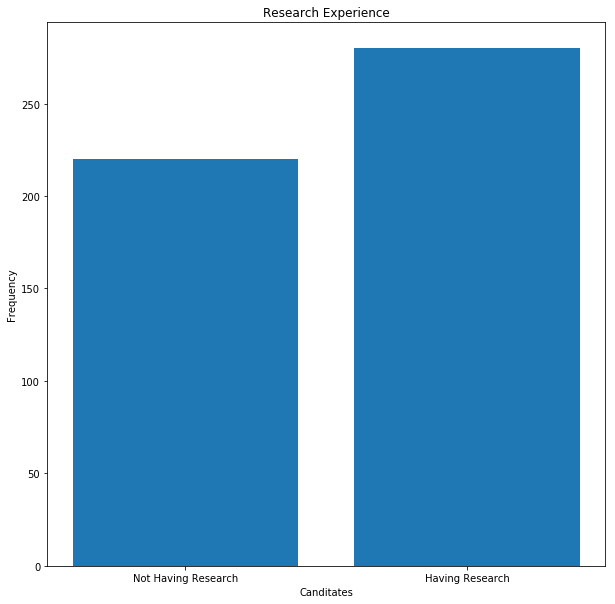

In [112]:
#280 and 220 so karo yaa na karo farak nai padta
plt.figure(figsize=(10, 10))
y = np.array([len(df[df.Research == 0]),len(df[df.Research == 1])])
x = ["Not Having Research","Having Research"]
plt.bar(x,y)
plt.title("Research Experience")
plt.xlabel("Canditates")
plt.ylabel("Frequency")
plt.show()

In [123]:
#So you must be thinking what will be the ideal scores, so here they are
df_sort=df.sort_values(by=df.columns[-1],ascending=False)
df_sort[(df_sort['Chance of Admit']>0.90)].mean()

GRE Score            332.852459
TOEFL Score          116.213115
University Rating      4.655738
SOP                    4.549180
LOR                    4.516393
CGPA                   9.523443
Research               1.000000
Chance of Admit        0.935574
dtype: float64

In [75]:
from sklearn.model_selection import train_test_split
x = df.drop(['Chance of Admit'], axis=1) #axis is basically horizontal line
y = df['Chance of Admit']

x_train, x_test,y_train, y_test = train_test_split(x,y,test_size = 0.25,random_state = 42) #random state is shuffling of training set

In [115]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
reg=linear_model.LinearRegression()
reg.fit(x_train,y_train)
reg.fit(x_train,y_train)
y_pred_reg=reg.predict(x_test)
print("Mean Squared Error for Linear Regression: ",mean_squared_error(y_test,y_pred_reg))

Mean Squared Error for Linear Regression:  0.0035857302916122414


In [116]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 100, random_state = 42)
rfr.fit(x_train,y_train)
y_pred_rfr = rfr.predict(x_test)
print("Mean Squared Error for Random Forest Regression: ",mean_squared_error(y_test,y_pred_rfr))

Mean Squared Error for Random Forest Regression:  0.004105240319999998


Text(0.5, 0.98, 'Actual vs Predicted')

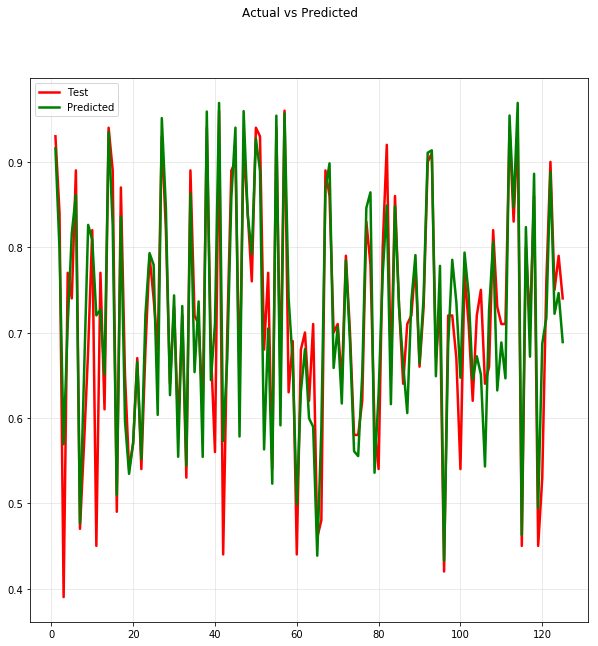

In [117]:
fig = plt.figure(figsize=(10,10))
c = [i for i in range(1,126,1)]
plt.plot(c,y_test, color = 'red', linewidth = 2.5, label='Test')
plt.plot(c,y_pred_reg, color = 'green', linewidth = 2.5, label='Predicted')
plt.grid(alpha = 0.3)
plt.legend()
fig.suptitle('Actual vs Predicted')

Text(0.5, 0.98, 'Actual vs Predicted')

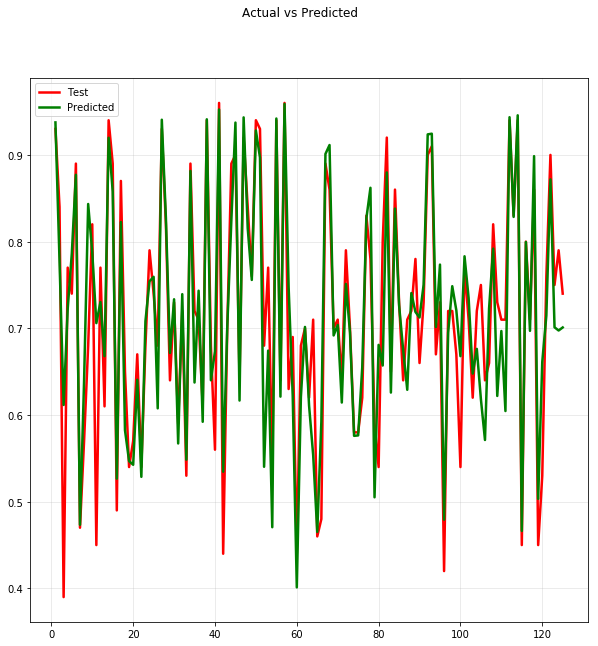

In [118]:
fig = plt.figure(figsize=(10,10))
c = [i for i in range(1,126,1)]
plt.plot(c,y_test, color = 'red', linewidth = 2.5, label='Test')
plt.plot(c,y_pred_rfr, color = 'green', linewidth = 2.5, label='Predicted')
plt.grid(alpha = 0.3)
plt.legend()
fig.suptitle('Actual vs Predicted')

In [114]:
Score=['325','110','3','4.0','5.0','7.8','0']
Score=pd.DataFrame(Score).T
chance=reg.predict(Score)
print("Your chance of admitting is: "+str("%.5f"%(chance[0]*100))+" %")

Your chance of admitting is: 67.22586 %
